In [1]:
%run helpers/example_setup.ipynb

WARNING - You are currently using an outdated version of AEDT. Please consider updating to the most recent service pack.


clean design created with default db, cell, layout, gnd_net variables.


c:\Users\mzandsal\github\pyedb-core\.venv\lib\site-packages\ansys\tools\common\cyberchannel.py:187: UserWarning: Starting gRPC client without TLS on localhost:50052. This is INSECURE. Consider using a secure connection.
  warn(f"Starting gRPC client without TLS on {target}. This is INSECURE. Consider using a secure connection.")


In [2]:
import sys
from pathlib import Path

tests_path = Path.cwd().parent / "tests"
if str(tests_path) not in sys.path:
    sys.path.insert(0, str(tests_path))

from backends.utils.fixtures import create_polygon

from ansys.edb.core.config import ComputationBackend, Config

%run helpers/plot.ipynb

In [3]:
data = {"data": [ArcData((0, 0), (10, 0), height=-2.0), ArcData((10, 0), (10, 10), height=2.0), ArcData((10, 10), (0, 10), height=0.0), ArcData((0, 10), (0, 0), height=0.0)],
 "holes": [[ArcData((4, 4), (6, 4), height=-1.0), ArcData((6, 4), (6, 6), height=1.0), ArcData((6, 6), (4, 6), height=0.0), ArcData((4, 6), (4, 4), height=0.0)]]}
polygon = create_polygon(data)

Config.set_computation_backend(ComputationBackend.SERVER)
moved_polygon_server = polygon.move((20, 0))

Config.set_computation_backend(ComputationBackend.SHAPELY)
moved_polygon_shapely = polygon.move((20, 0))

Config.set_computation_backend(ComputationBackend.BUILD123D)
moved_polygon_build123d = polygon.move((20, 0))

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: float or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: :mpltype:`color`
  figure: `~matplotlib.figure.Figure` or `~matplotlib.figure.SubFigure`
  forward_navigation_events: bool or "auto"
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: list of `.AbstractPathEffect`
  picker: None or bool or float or c

<Figure size 640x480 with 0 Axes>

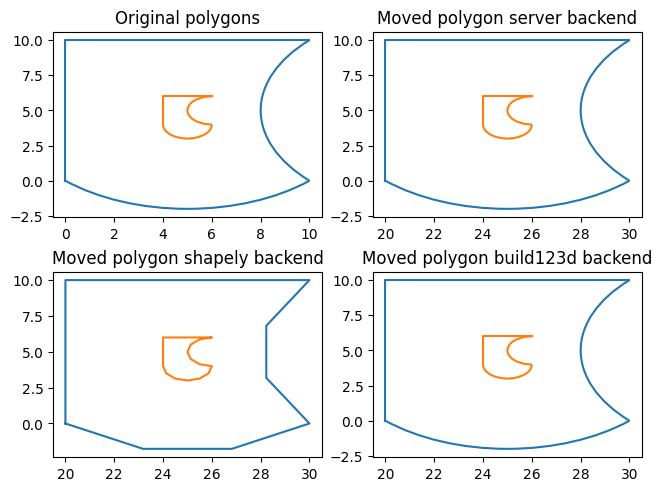

In [4]:
plt.figure()
fig, axs = plt.subplots(2, 2, constrained_layout=True)
plt.setp(axs)

plot_polys(axs[0][0], [polygon], "Original polygons")
plot_polys(axs[0][1], [moved_polygon_server], "Moved polygon server backend")
plot_polys(axs[1][0], [moved_polygon_shapely], "Moved polygon shapely backend")
plot_polys(axs[1][1], [moved_polygon_build123d], "Moved polygon build123d backend")

plt.show()

In [5]:
%run helpers/example_teardown.ipynb